# import and explore the dataset

In [69]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv("/kaggle/input/linkedin-data-jobs-dataset/clean_jobs.csv" , index_col = ['id'] )
df.head()

,title,company,location,link,source,date_posted,work_type,employment_type,description
id,,,,,,,,,
1,Data Analyst,Meta,"New York, NY",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
2,Data Analyst,Meta,"San Francisco, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
3,Data Analyst,Meta,"Los Angeles, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
4,Data Analyst,Meta,"Washington, DC",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
5,Data Analyst II,Pinterest,"Chicago, IL",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-16,NaN,NaN,About Pinterest\n\nMillions of people around t...


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327 entries, 1 to 741
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            327 non-null    object 
 1   company          327 non-null    object 
 2   location         327 non-null    object 
 3   link             327 non-null    object 
 4   source           327 non-null    object 
 5   date_posted      327 non-null    object 
 6   work_type        0 non-null      float64
 7   employment_type  0 non-null      float64
 8   description      327 non-null    object 
dtypes: float64(2), object(7)
memory usage: 25.5+ KB


In [72]:
df.iloc[:,-3:-1]

,work_type,employment_type
id,,
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
...,...,...
691,NaN,NaN
692,NaN,NaN
693,NaN,NaN


In [73]:
## drop those two empty columns 
df.drop(['work_type','employment_type'] , axis = 1 , inplace =True )

In [74]:
df.describe()

,title,company,location,link,source,date_posted,description
count,327,327,327,327,327,327,327
unique,149,193,120,327,1,8,269
top,Data Analyst,Meta,"New York, NY",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,"As a Data Engineer at Meta, you will shape the..."
freq,53,57,31,1,327,87,11


In [75]:
## Applying lower() method to avoid dups
df_lower = df.apply(lambda x : x.str.lower())
df_lower.describe()

,title,company,location,link,source,date_posted,description
count,327,327,327,327,327,327,327
unique,146,193,120,327,1,8,269
top,data analyst,meta,"new york, ny",https://www.linkedin.com/jobs/view/data-analys...,linkedin,2025-04-14,"as a data engineer at meta, you will shape the..."
freq,54,57,31,1,327,87,11


## Converting data types and adding columns

In [76]:
## convert date column
df_lower['date_posted'] = pd.to_datetime(df_lower['date_posted']).dt.date


In [77]:
## Checking dups
df_lower[df_lower.duplicated(['title','description' ,'company' ])].link.to_list()

['https://www.linkedin.com/jobs/view/data-analyst-at-meta-4186241553',
 'https://www.linkedin.com/jobs/view/data-analyst-at-meta-4186236994',
 'https://www.linkedin.com/jobs/view/data-analyst-at-meta-4186237989',
 'https://www.linkedin.com/jobs/view/data-analyst-ii-at-pinterest-4193356222',
 'https://www.linkedin.com/jobs/view/data-analyst-ii-at-pinterest-4193351793',
 'https://www.linkedin.com/jobs/view/data-analyst-at-fanduel-4206048749',
 'https://www.linkedin.com/jobs/view/data-products-analyst-youtube-at-google-4209686721',
 'https://www.linkedin.com/jobs/view/data-products-analyst-youtube-at-google-4209686719',
 'https://www.linkedin.com/jobs/view/data-products-analyst-youtube-at-google-4209686718',
 'https://in.linkedin.com/jobs/view/data-analytics-at-ey-4210588770',
 'https://www.linkedin.com/jobs/view/data-scientist-product-analytics-at-meta-4129160710',
 'https://www.linkedin.com/jobs/view/data-scientist-product-analytics-at-meta-4120825485',
 'https://www.linkedin.com/jobs/v

**After some examination i decide that i need to remove some jobs because those jobs have the same title , description and company which means -in my opinion- it is the same posistion but with differnet location in linkedIn**

In [78]:
df_lower.drop_duplicates(['title','description' ,'company' ] , inplace= True)

In [79]:
## Creating a regex map 
regex_map = {
    r'\b(analyst|analysis|analista|analytics|analista)\b': 'data analysis',
    r'^(?=.*\bdata\b)(?=.*\b(scientist)\b).*|\b(cientista)\b': 'data science',
    r'^(?=.*\bdata\b)(?=.*\b(engineer)\b).*': 'data engineering',
    r'^(?=.*\bmachine\b)(?=.*\b(learning)\b).*|\b(ai|ml)\b': 'machine learning & AI',
}
def mapping(s:str) : 
    for pattern, category in regex_map.items():
        if re.search(pattern, s):
            return category
    # return s
    return 'other'
df_lower['category'] = df_lower['title'].apply(mapping).astype('category')
df_lower['category'].value_counts()

category
data analysis            124
data engineering          65
data science              52
machine learning & AI     22
other                      6
Name: count, dtype: int64

**Explaination of what i did**

I have categorized the jobs into main categories based on keywords found in the job titles. For example, for data analysis roles, I look for terms like "analyst", "analysis", "analista", or "analytics". For data science, I check for "data" followed by "scientist" or just the word "cientista", among others.

This categorization helps in creating simple categories to work with. If you want to inspect other job titles or categories, you can uncomment return s to view them.

In [80]:
# ## Creating a regex map 
# regex_map = {
#     r'\b(junior|jr|juniors?|entry-level|fresh graduate)\b': 'junior',
#     r'\b(senior|sr|senior-level|experienced|lead|management)\b': 'senior',
#     r'\b(lead|team lead|leadership|head of|manager)\b': 'lead',
#     r'\b(intern|internship|trainee|apprentice)\b': 'intern',
#     r'\b(associate|assistant|junior assistant)\b': 'associate',

# }
# def mapping(s:str) : 
#     for pattern, category in regex_map.items():
#         if re.search(pattern, s):
#             return category
#     return s
#     # return 'other'
# df_lower['level'] = df_lower['description'].apply(mapping)
# df_lower['level'].value_counts()

In [104]:

state_names = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District ", "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
abbreviations = [
    # https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#States.
    "AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "IA",
    "ID", "IL", "IN", "KS", "KY", "LA", "MA", "MD", "ME", "MI", "MN", "MO",
    "MS", "MT", "NC", "ND", "NE", "NH", "NJ", "NM", "NV", "NY", "OH", "OK",
    "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI",
    "WV", "WY",
    # https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#Federal_district.
    "DC",
    # https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#Inhabited_territories.
    "AS", "GU", "MP", "PR", "VI",
]
state_names = "|".join(map(lambda x : x.lower() , state_names))
abbreviations = "|".join(map(lambda x : x.lower() , abbreviations))

## Creating a regex map 

regex_map = {
    rf'\b({state_names}|united states|{abbreviations})\b': 'USA',
    rf'\b(india)\b': 'india',
    rf'\b(united kingdom)\b': 'united kingdom',
    rf'\b(brazil)\b': 'brazil',
    rf'\b(indonesia)\b': 'indonesia',
    rf'\b(dublin|county dublin|ireland)\b': 'ireland',
    rf'\b(toronto|ontario|canada)\b': 'canada',
    rf'\b(cairo|egypt)\b': 'egypt',
    rf'\b(lisbon|metropolitan area)\b': 'portugal',
    rf'\b(san francisco|bay area)\b': 'USA',
    rf'\b(puchong|selangor|malaysia)\b': 'malaysia',
    rf'\b(bengaluru|greater bengaluru area)\b': 'india',
    rf'\b(spain)\b': 'spain',
    rf'\b(mexico city|mexico)\b': 'mexico',
    rf'\b(utica-rome area)\b': 'USA',
    rf'\b(madrid|community of madrid)\b': 'spain',
    rf'\b(manila|national capital region|philippines)\b': 'philippines',
    rf'\b(porto metropolitan area)\b': 'portugal',
    rf'\b(mississauga|ontario|canada)\b': 'canada',
    rf'\b(johannesburg|gauteng|south africa)\b': 'south africa',
    rf'\b(singapore)\b': 'singapore',
    rf'\b(sofia|sofia city|bulgaria)\b': 'bulgaria',
    rf'\b(riyadh|saudi arabia)\b': 'saudi arabia',
    rf'\b(greece)\b': 'greece',
    rf'\b(amsterdam|north holland|netherlands)\b': 'netherlands',
    rf'\b(minneapolis|st. paul|greater minneapolis-st. paul area)\b': 'USA',
    rf'\b(kolkata|greater kolkata area)\b': 'india',
    rf'\b(istanbul|greater istanbul)\b': 'turkey',
    rf'\b(chicago|greater chicago area)\b': 'USA',
    rf'\b(geneva|switzerland)\b': 'switzerland',
    rf'\b(gauteng|south africa)\b': 'south africa',
    rf'\b(dubai|united arab emirates)\b': 'united arab emirates',
    rf'\b(cork|county cork|ireland)\b': 'ireland',
    rf'\b(johannesburg|city of johannesburg|gauteng|south africa)\b': 'south africa',
    rf'\b(canada)\b': 'canada',
    rf'\b(berlin|germany)\b': 'germany',
    rf'\b(barcelona|catalonia|spain)\b': 'spain',
    rf'\b(bangkok|metropolitan area)\b': 'thailand',
    rf'\b(athens|attiki|greece)\b': 'greece',
    rf'\b(warsaw|mazowieckie|poland)\b': 'poland'
}

def mapping(s:str) : 
    for pattern, category in regex_map.items():
        if re.search(pattern, s):
            return category
    return s
    # return 'other'
df_lower['country'] = df_lower['location'].apply(mapping)
df_lower['country'].value_counts()


country
USA                     147
india                    47
united kingdom           25
brazil                    9
canada                    5
indonesia                 5
ireland                   4
portugal                  4
spain                     3
south africa              3
malaysia                  2
greece                    2
egypt                     2
singapore                 1
poland                    1
saudi arabia              1
bulgaria                  1
germany                   1
mexico                    1
united arab emirates      1
switzerland               1
philippines               1
netherlands               1
turkey                    1
Name: count, dtype: int64

**Explaination of what i did**


Using regular expressions, I mapped locations to their corresponding countries by checking if any of the key terms appear in the location data.

I then applied this mapping to the 'location' column to create a new 'country' column.

The result is a new 'country' column with locations categorized by their respective countries. If a location doesn't match any pattern, it remains unchanged.

You can check the distribution of countries using value_counts() on the 'country' column to see how many entries belong to each country.

# Explatory Data Analysis

In [82]:
df_lower.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269 entries, 1 to 740
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   title        269 non-null    object  
 1   company      269 non-null    object  
 2   location     269 non-null    object  
 3   link         269 non-null    object  
 4   source       269 non-null    object  
 5   date_posted  269 non-null    object  
 6   description  269 non-null    object  
 7   category     269 non-null    category
 8   country      269 non-null    category
dtypes: category(2), object(7)
memory usage: 18.3+ KB


## Univariate Analysis

### Categories and titles

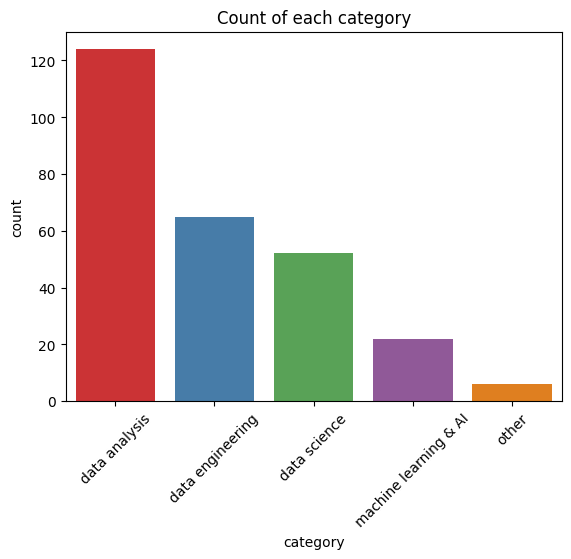

In [83]:
# Plot the counts of different categories
sns.set_palette("Set1")
sns.countplot(x='category', data=df_lower )


# Rotate the x-axis labels for better readability
plt.title('Count of each category')
plt.xticks(rotation=45)
plt.show()

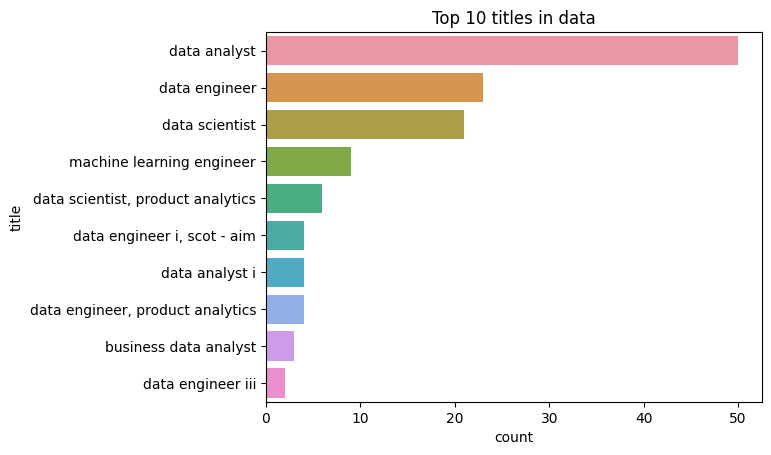

In [84]:
# Count the occurrences of each titel
title_counts = df_lower['title'].value_counts().reset_index()
title_counts.columns = ['title', 'count']  # Rename columns

# Plot the counts of different titles
sns.set_palette("Set1")
sns.barplot(y='title', x='count', data=title_counts.head(10), estimator=sum)
plt.title('Top 10 titles in data')
plt.show()


### Companies

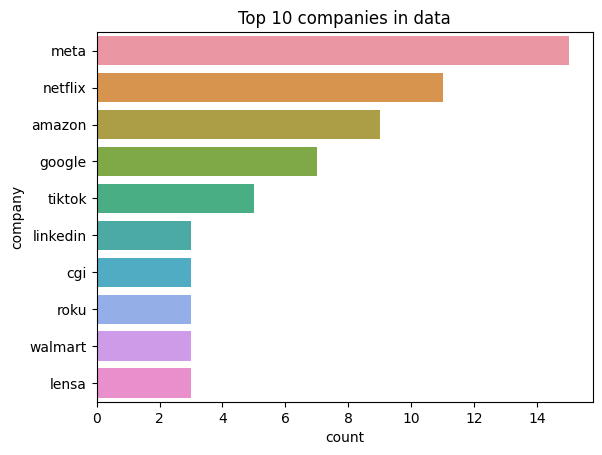

In [85]:
# Count the occurrences of each company
company_counts = df_lower['company'].value_counts().reset_index()
company_counts.columns = ['company', 'count']  

# Plot the counts of different companies
sns.set_palette("Set1")
sns.barplot(y='company', x='count', data=company_counts.head(10), estimator=sum)
plt.title('Top 10 companies in data')
plt.show()


### Country and location

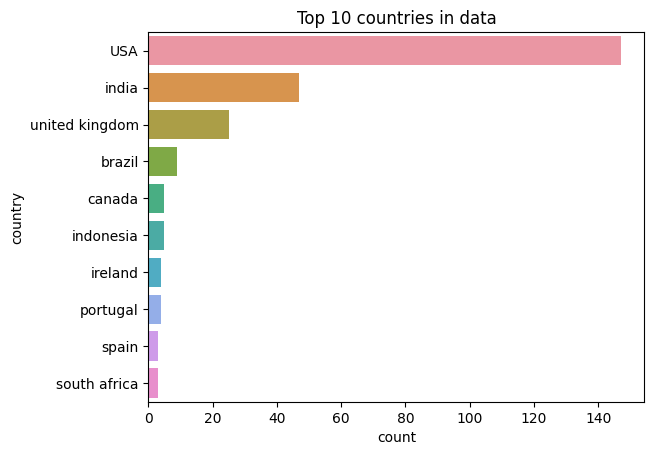

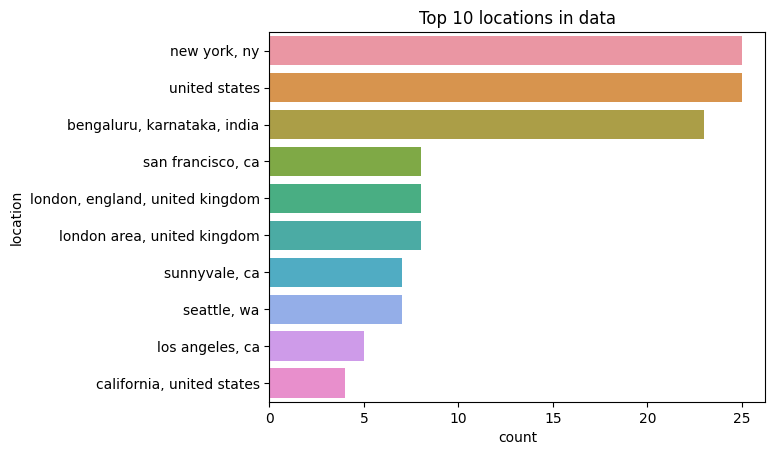

In [112]:
# Count the occurrences of each country
country_counts = df_lower['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count'] 
location_counts = df_lower['location'].value_counts().reset_index()
location_counts.columns = ['location', 'count'] 
# Plot the counts of different countries
sns.set_palette("Set1")
sns.barplot(y='country', x='count', data=country_counts.head(10))
plt.title('Top 10 countries in data')
plt.show()

# Plot the counts of different locations
sns.barplot(y='location', x='count', data=location_counts.head(10))
plt.title('Top 10 locations in data')
plt.show()





In [96]:
top10 = country_counts.head(10)
top10

,country,count
0,USA,147
1,india,47
2,united kingdom,25
3,brazil,9
4,canada,5
5,indonesia,5
6,ireland,4
7,portugal,4
8,spain,3
9,south africa,3


In [87]:
df_lower.sample(5)

,title,company,location,link,source,date_posted,description,category,country
id,,,,,,,,,
103,healthcare data analyst,infosys,"bengaluru east, karnataka, india",https://in.linkedin.com/jobs/view/healthcare-d...,linkedin,2025-04-16,"healthcare data analyst ,pl/sql, sql, data map...",data analysis,india
443,data scientist,sigma suisse,"geneva, switzerland",https://ch.linkedin.com/jobs/view/data-scienti...,linkedin,2025-04-16,"sigma suisse is seeking for it's client, a com...",data science,switzerland
625,"sr. data engineer, analytics",quizlet,"new york, ny",https://www.linkedin.com/jobs/view/sr-data-eng...,linkedin,2025-04-15,about quizlet\n\ninspired by our belief that a...,data analysis,USA
496,machine learning software engineer (l5) - cont...,netflix,united states,https://www.linkedin.com/jobs/view/machine-lea...,linkedin,2025-04-12,netflix is one of the world's leading entertai...,machine learning & AI,USA
458,"data scientist, consumer research & marketing",handshake,"san francisco, ca",https://www.linkedin.com/jobs/view/data-scient...,linkedin,2025-04-13,everyone is welcome at handshake. we know dive...,data science,USA


## Date analysis

In [88]:
## What is the minimum and the maximum date
df_lower['date_posted'].min()\
,df_lower['date_posted'].max()

(datetime.date(2025, 4, 10), datetime.date(2025, 4, 17))

In [89]:
category_per_date = df_lower.groupby('date_posted')['category'].value_counts()
jobs_per_date = df_lower.groupby('date_posted')['title'].count().reset_index('date_posted')


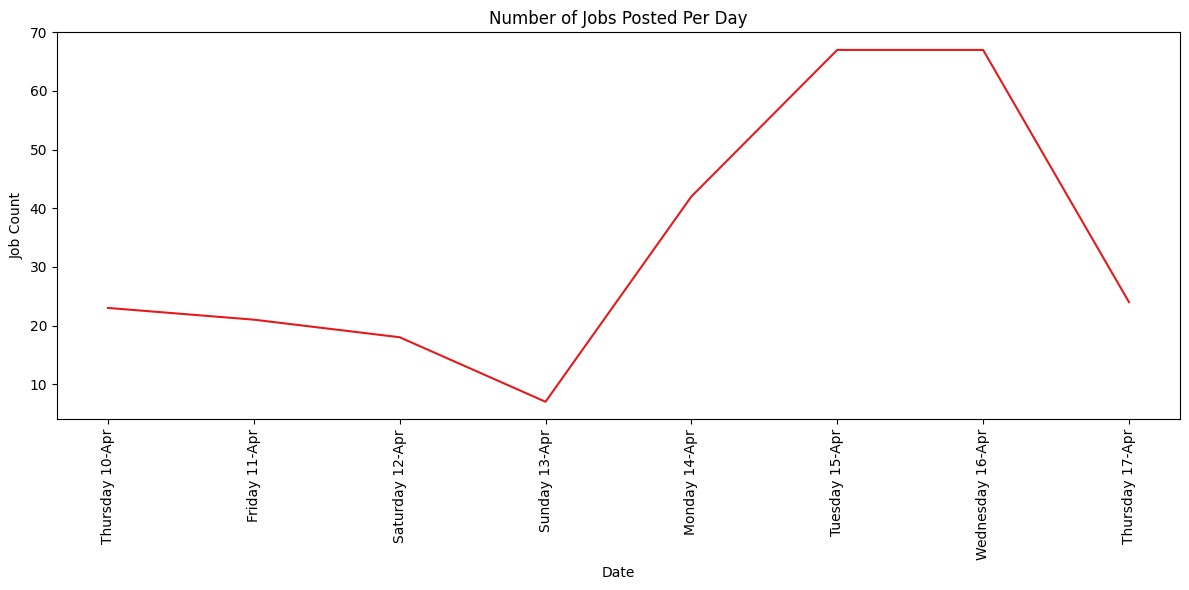

In [136]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

jobs_per_date = df_lower.groupby('date_posted').size().reset_index()
jobs_per_date['date_posted'] = pd.to_datetime(jobs_per_date['date_posted']).dt.strftime("%A %d-%b")
jobs_per_date.columns = ['Date', 'Count']

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Count', data=jobs_per_date)
plt.xticks(rotation=90)
plt.title('Number of Jobs Posted Per Day')
plt.xlabel('Date')
plt.ylabel('Job Count')
plt.tight_layout()
plt.show()


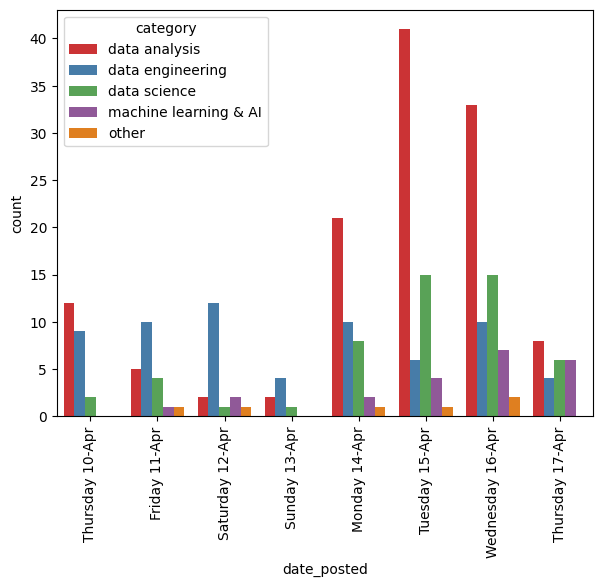

In [113]:
# Get counts of each category per date
category_per_date = df_lower.groupby(['date_posted', 'category']).size().reset_index(name='count')
category_per_date['date_posted'] = pd.to_datetime(category_per_date['date_posted']).dt.strftime("%A %d-%b")

# Plot
sns.barplot(x='date_posted', y='count', hue='category', data=category_per_date)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

**AS excpcted the number of jobs posted decreased in holidays (Saturday and Sunday) and raise in the middle of the week**

## Cheking how many times a certain skill is mentioned

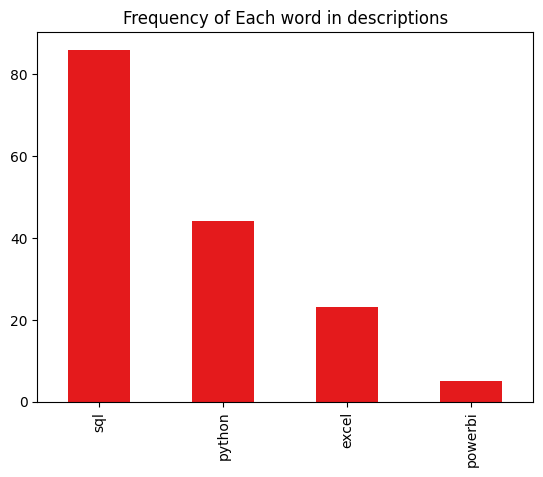

In [140]:
df_analysis = df_lower[df_lower['category'] == 'data analysis']
words = {}
for des in df_analysis['description'] : 
    for word in des.split() :
        if word not in words : 
            words[word] = 0
        
        words[word] += 1
words_mentioned = pd.Series(words).sort_values() 

words_mentioned[['python' , 'sql' , 'powerbi' ,'excel']].sort_values(ascending =False).plot(kind ='bar' , title = 'Frequency of Each word in descriptions')
plt.show()